In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### data
- survived : 생존여부, 1 = 생존, 0 = 사망
- pclass : 좌석등급, 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp : 형제, 자매 / 배우자
- parch : 부모 / 자녀
- ticket : 티켓번호
- fare : 운임
- cabin : 좌석번호
- embarked : 승선항구, s = southampton, c = cherbourg, q = qeueenstown

- 전처리

In [7]:
train = df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [8]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train["Sex"] = train["Sex"].replace(["male", "female"], [0, 1]) #리코딩

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [13]:
train["Embarked"] = train["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [16]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# 범주형(이산형) 데이터
- Survived Pclass Sex Embarked

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

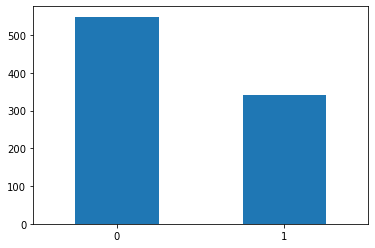

In [19]:
train["Survived"].value_counts().plot(kind = "bar", rot = 0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

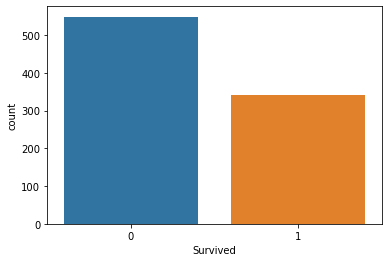

In [20]:
sns.countplot(x = "Survived", data = train)

In [21]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

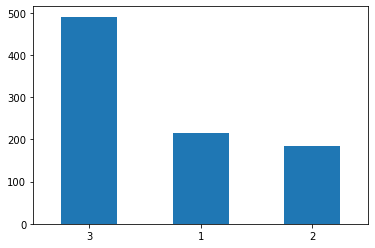

In [22]:
train["Pclass"].value_counts().plot(kind = "bar", rot = 0)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

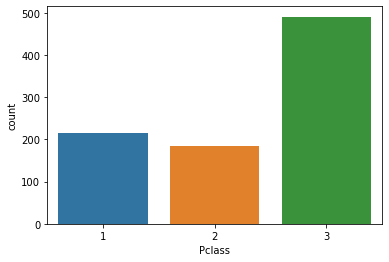

In [23]:
sns.countplot(x = "Pclass", data = train)

- 결측값 채우기

In [24]:
train["Embarked"].isnull().sum()

2

In [25]:
train_fill = train.fillna({"Embarked" : 0}) # 결측값 채움

In [26]:
train_fill["Embarked"].isnull().sum()

0

In [27]:
train_fill["Embarked"].value_counts()

0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64

- Survived - 범주형 데이터

In [28]:
train_fill.groupby(train["Survived"]).describe().T

Survived            0      1
Survived count  549.0  342.0
         mean     0.0    1.0
         std      0.0    0.0
         min      0.0    1.0
         25%      0.0    1.0
...               ...    ...
Embarked min      0.0    0.0
         25%      0.0    0.0
         50%      0.0    0.0
         75%      0.0    1.0
         max      2.0    2.0

[64 rows x 2 columns]

In [29]:
S_S = train_fill.groupby(train["Survived"])[["Sex"]].count()
S_S

,Sex
Survived,
0,549
1,342


<AxesSubplot:xlabel='Survived'>

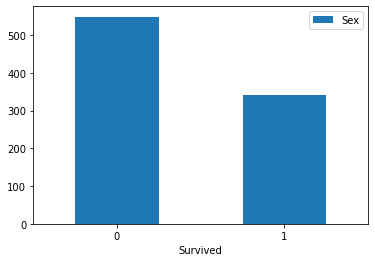

In [30]:
S_S.plot(kind = "bar", rot = 0 )

In [31]:
pd.crosstab(train_fill.Survived, train_fill.Sex)

Sex,0,1
Survived,,
0,468,81
1,109,233


<AxesSubplot:xlabel='Survived'>

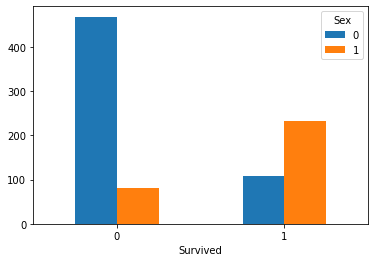

In [32]:
df = pd.crosstab(train_fill.Survived, train_fill.Sex)
df.plot(kind = "bar", rot = 0)

In [126]:
survived = train_fill[train_fill["Survived"]==1]["Sex"].value_counts()
dead =  train_fill[train_fill["Survived"]==0]["Sex"].value_counts()
df2 = pd.DataFrame([dead, survived], index = ["dead", "survived"])

In [127]:
df2

,0,1
dead,468,81
survived,109,233


<AxesSubplot:>

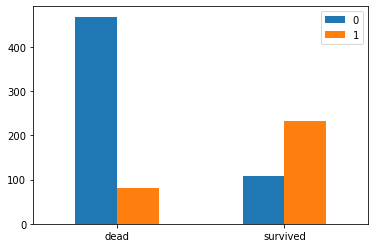

In [35]:
df2.plot(kind = "bar", rot = 0)

In [36]:
def survived_ctg(feature):
    df = pd.crosstab(train_fill["Survived"], train_fill[feature])
    df.plot(kind = "bar", rot = 0)

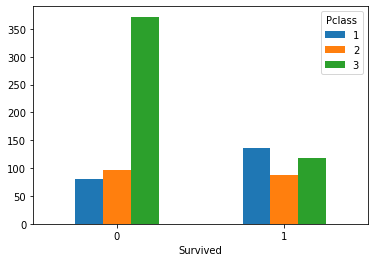

In [37]:
survived_ctg("Pclass")

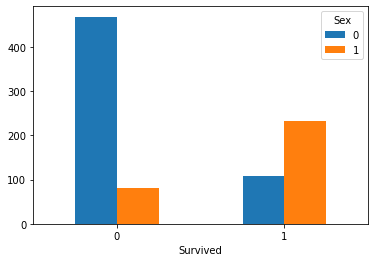

In [38]:
survived_ctg("Sex")

- 교차분석 

In [128]:
from scipy import stats

df = pd.crosstab(train_fill.Survived, train_fill.Sex)
stats.chi2_contingency(df)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[355.52525253, 193.47474747],
        [221.47474747, 120.52525253]]))

- 해석: 카이제곱값이 260.72일 때, 유의확률은 .000으로서 0.05에서 유의하다.
- 그러므로 'Sex' 값에 따라 'Survived' 에 차이가 있다. 라고 할 수있다.

In [40]:
def survived_ctg(feature):
    df = pd.crosstab(train_fill["Survived"], train_fill[feature])
    chi2 = stats.chi2_contingency(df)
    df.plot(kind = "bar", rot = 0)
    print("=== cross table ===\n", df)
    print("=== chi2-test ====\n", chi2)

=== cross table ===
 Sex         0    1
Survived          
0         468   81
1         109  233
=== chi2-test ====
 (260.71702016732104, 1.1973570627755645e-58, 1, array([[355.52525253, 193.47474747],
       [221.47474747, 120.52525253]]))


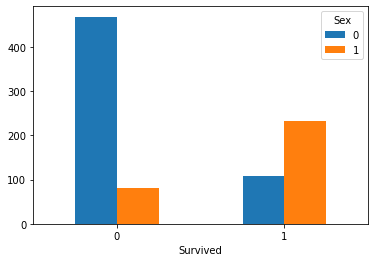

In [41]:
survived_ctg("Sex")

=== cross table ===
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
=== chi2-test ====
 (102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))


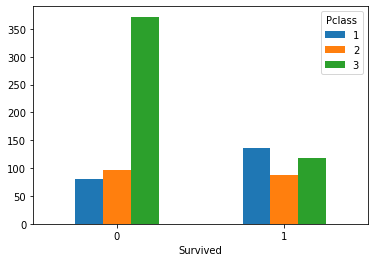

In [42]:
survived_ctg("Pclass")

=== cross table ===
 Embarked  0.0  1.0  2.0
Survived               
0         427   75   47
1         219   93   30
=== chi2-test ====
 (25.964452881874788, 2.300862648144953e-06, 2, array([[398.04040404, 103.51515152,  47.44444444],
       [247.95959596,  64.48484848,  29.55555556]]))


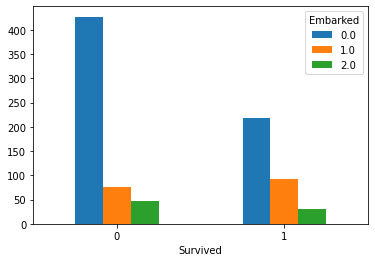

In [43]:
survived_ctg("Embarked")

In [44]:
def survived_ctg2(feature1, feature2):
    df = pd.crosstab(train_fill[feature1], train_fill[feature2])
    chi2 = stats.chi2_contingency(df)
    df.plot(kind = "bar", rot = 0)
    print("=== cross table ===\n", df)
    print("=== chi2-test ====\n", chi2)

=== cross table ===
 Sex       0    1
Pclass          
1       122   94
2       108   76
3       347  144
=== chi2-test ====
 (16.97149909551711, 0.0002063886434823315, 2, array([[139.87878788,  76.12121212],
       [119.15600449,  64.84399551],
       [317.96520763, 173.03479237]]))


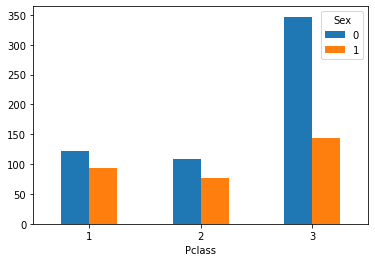

In [45]:
survived_ctg2("Pclass", "Sex")

# 연속형 데이터
- Age SibSp Parch Fare

In [46]:
train_fill["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [47]:
from scipy import stats

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

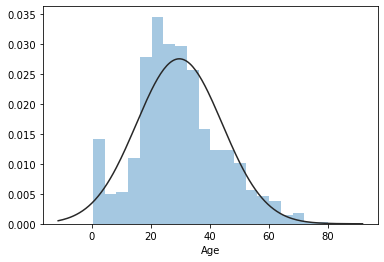

In [48]:
sns.distplot(train_fill["Age"], fit = stats.norm, kde =False)

<AxesSubplot:ylabel='Age'>

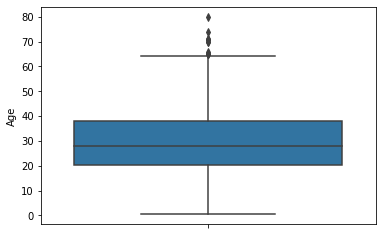

In [49]:
sns.boxplot(y = train_fill["Age"])

In [50]:
def graph(feature):
    describe = train_fill[feature].describe()
    plt.subplot(2, 1, 1) # 2x1 행렬 1번째
    sns.distplot(train_fill[feature], fit = stats.norm, kde =False)
    plt.subplot(2, 1, 2)
    sns.boxplot(x = train_fill[feature])
    print(describe)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


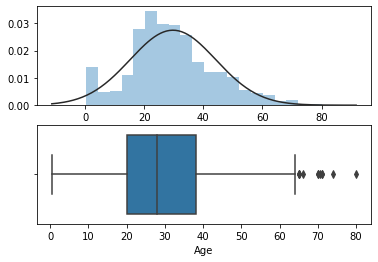

In [51]:
graph("Age")

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


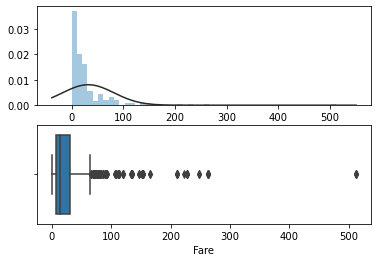

In [52]:
graph("Fare")

- 결측값 채우기

In [53]:
train_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [54]:
train_fill["Age"].isnull().sum()

177

In [132]:
train_fill.groupby("Survived")[["Age"]].mean()

,Age
Survived,
0,30.626179
1,28.343690


In [56]:
age_mean0 = train_fill[train_fill["Survived"] == 0]["Age"].mean()
age_mean1 = train_fill[train_fill["Survived"] == 1]["Age"].mean()
print(age_mean0)
print(age_mean1)

30.62617924528302
28.343689655172415


In [57]:
train_fill.loc[train_fill["Survived"]== 1, "Age"] = train_fill[train_fill["Survived"] == 1]["Age"].fillna(age_mean1)
# 결측 값을 age의 평균으로 채워 넣어라

In [58]:
train_fill["Age"].isnull().sum()

125

In [59]:
train_fill.loc[train_fill["Survived"]== 0, "Age"] = train_fill[train_fill["Survived"] == 0]["Age"].fillna(age_mean0)

In [60]:
train_fill["Age"].isnull().sum()

0

In [61]:
train_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [62]:
train_fill.groupby("Survived")[["Age"]].mean()

,Age
Survived,
0,30.626179
1,28.343690


<AxesSubplot:xlabel='Survived', ylabel='Age'>

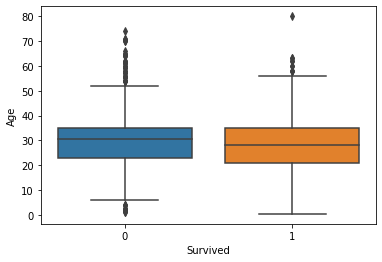

In [63]:
sns.boxplot(x = "Survived", y = "Age", data = train_fill)

- 평균차이분석 ,value 값으로 표현

In [134]:
survived = train_fill[train_fill["Survived"] == 1]["Age"].values
dead = train_fill[train_fill["Survived"] == 0]["Age"].values

In [65]:
from scipy import stats

stats.f_oneway(survived, dead)

F_onewayResult(statistic=6.525687367945036, pvalue=0.010798379035661262)

In [66]:
def survived_mean(feature):
    df = train_fill.groupby("Survived")[[feature]].mean()
    
    survived = train_fill[train_fill["Survived"] == 1][feature].values
    dead = train_fill[train_fill["Survived"] == 0][feature].values
    F_test = stats.f_oneway(survived, dead)
    
    sns.boxplot(train_fill["Survived"], train_fill[feature])
    print(df)
    print(F_test)

                Age
Survived           
0         30.626179
1         28.343690
F_onewayResult(statistic=6.525687367945036, pvalue=0.010798379035661262)


C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


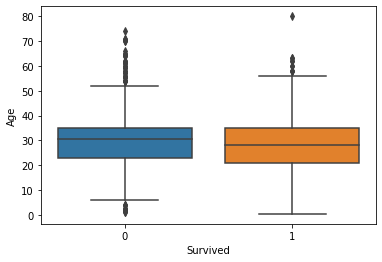

In [67]:
survived_mean("Age")

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


               Fare
Survived           
0         22.117887
1         48.395408
F_onewayResult(statistic=63.03076422804448, pvalue=6.120189341921873e-15)


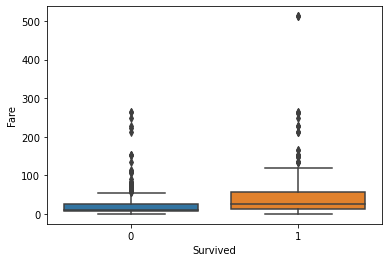

In [68]:
survived_mean("Fare")

- 사후검정

In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [70]:
tukey = pairwise_tukeyhsd(endog = train_fill["Age"], groups = train_fill["Survived"],
                        alpha = 0.05)

In [135]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-2.2825,0.0108,-4.0361,-0.5289,True


- modeling

In [72]:
import statsmodels.formula.api as smf

In [73]:
train_fill.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [74]:
logit_model = smf.logit("Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)",
                       data = train_fill).fit()

Optimization terminated successfully.
         Current function value: 0.437719
         Iterations 6


In [75]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.343     
Dependent Variable:  Survived         AIC:              800.0159  
Date:                2021-02-18 18:12 BIC:              847.9394  
No. Observations:    891              Log-Likelihood:   -390.01   
Df Model:            9                LL-Null:          -593.33   
Df Residuals:        881              LLR p-value:      5.2469e-82
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept           1.0805   0.4064  2.6584 0.0079  0.2839  1.8771
C(Pclass)[T.2]     -0.9653   0.2988 -3.2312 0.0012 -1.5509 -0.3798
C(Pclass)[T.3]     -2.1996   0.2989 -7.3593 0.0000 -2.7854 -1.6138
C(Sex)[T.1]         2.7179   0.2017 13.4776 0.0000  2.3227  3.1132
C(Embarked)[T.1.0]  0.4352   0.2407  1.8078 0.0706 -0.0366  0.9070
C(Embarked)[T.2.0]  0.4056   0.3347  1.2116 0.2257 -0.2505  1.0617
Age                -0.0423   0.0079 -5.3304 0.0000 -0.0579 -0.0268
SibSp              -0.3320   0.1106 -3.0014 0.0027 -0.5488 -0.1152
Parch              -0.0985   0.1197 -0.8223 0.4109 -0.3331  0.1362
Fare                0.0022   0.0025  0.9066 0.3646 -0.0026  0.0071
==================================================================

"""

In [76]:
# 오즈값 
import numpy as np

np.exp(logit_model.params)

Intercept              2.946177
C(Pclass)[T.2]         0.380859
C(Pclass)[T.3]         0.110852
C(Sex)[T.1]           15.149085
C(Embarked)[T.1.0]     1.545253
C(Embarked)[T.2.0]     1.500178
Age                    0.958552
SibSp                  0.717491
Parch                  0.906231
Fare                   1.002240
dtype: float64

In [77]:
predict = pd.DataFrame({"predict": logit_model.predict()})
predict.head()

,predict
0,0.085794
1,0.920750
2,0.626216
3,0.891262
4,0.070265


In [78]:
train_pred = train_fill.copy()

In [79]:
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [80]:
train_fill.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [81]:
train_pred["predict"] = predict
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265


In [82]:
train_fill.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [83]:
def pre_group(series):
    if series < 0.5:
        return 0
    else:
        return 1

In [84]:
train_pred["pre_group"] = train_pred["predict"].apply(pre_group)
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict,pre_group
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794,0
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750,1
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216,1
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262,1
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265,0


In [85]:
pd.crosstab(train_pred.Survived, train_pred.pre_group, margins = True, normalize = True)

pre_group,0,1,All
Survived,,,
0,0.534231,0.081930,0.616162
1,0.114478,0.269360,0.383838
All,0.648709,0.351291,1.000000


In [86]:
logit_model2 = smf.logit("Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch",
                        data = train_fill).fit()

Optimization terminated successfully.
         Current function value: 0.440951
         Iterations 6


In [87]:
logit_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.338     
Dependent Variable: Survived         AIC:              799.7748  
Date:               2021-02-18 18:12 BIC:              833.3212  
No. Observations:   891              Log-Likelihood:   -392.89   
Df Model:           6                LL-Null:          -593.33   
Df Residuals:       884              LLR p-value:      1.8080e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.4387   0.3541  4.0628 0.0000  0.7446  2.1327
C(Pclass)[T.2]    -1.2212   0.2629 -4.6444 0.0000 -1.7366 -0.7059
C(Pclass)[T.3]    -2.3903   0.2444 -9.7805 0.0000 -2.8693 -1.9113
C(Sex)[T.1]        2.7676   0.1993 13.8865 0.0000  2.3770  3.1582
Age               -0.0435   0.0079 -5.5035 0.0000 -0.0589 -0.0280
SibSp             -0.3436   0.1097 -3.1329 0.0017 -0.5586 -0.1287
Parch             -0.0832   0.1154 -0.7217 0.4705 -0.3093  0.1428
=================================================================

"""

In [88]:
np.exp(logit_model2.params)

Intercept          4.215084
C(Pclass)[T.2]     0.294866
C(Pclass)[T.3]     0.091599
C(Sex)[T.1]       15.919958
Age                0.957477
SibSp              0.709182
Parch              0.920125
dtype: float64

In [89]:
predict2 = pd.DataFrame({"predict2" : logit_model2.predict()})
predict2.head()

,predict2
0,0.095238
1,0.901265
2,0.665101
3,0.912274
4,0.077805


In [90]:
train_pred["predict2"] = predict2
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict,pre_group,predict2
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794,0,0.095238
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750,1,0.901265
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216,1,0.665101
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262,1,0.912274
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265,0,0.077805


In [91]:
train_pred["pre_group2"] = train_pred["predict2"].apply(pre_group)
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict,pre_group,predict2,pre_group2
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794,0,0.095238,0
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750,1,0.901265,1
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216,1,0.665101,1
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262,1,0.912274,1
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265,0,0.077805,0


In [92]:
pd.crosstab(train_pred.Survived, train_pred.pre_group2, margins = True, normalize = True)
# p-valued 값이 유의하지않다고 정확도를 떨어뜨리는 것이 아님

pre_group2,0,1,All
Survived,,,
0,0.518519,0.097643,0.616162
1,0.107744,0.276094,0.383838
All,0.626263,0.373737,1.000000


In [93]:
# threshold 확률 기준 값
def cut_off(target, threshold):
    Target = target.copy()
    Target[Target>=threshold]=1
    Target[Target<threshold]=0
    return(Target.astype(int))

pred_T = cut_off(predict2, 0.9)
pred_T

,predict2
0,0
1,1
2,0
3,1
4,0
...,...
886,0
887,1
888,0
889,0


In [136]:
a = np.arange(0.1, 1, 0.1)
a

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [94]:
threshold = np.arange(0.1, 1, 0.1) #확률 기준을 만들기위해 선언
table = pd.DataFrame(columns = ['Acc'])

for i in threshold:
    predict = cut_off(predict2, i)
    df = train_pred[["Survived"]].join(predict["predict2"]) # 실제값과 예측값을 붙여줌
    matrix = pd.crosstab(df.Survived, df.predict2, normalize = True)
    table.loc[i] = (matrix.iloc[0, 0] + matrix.iloc[1,1])

table.index.name = "threshold"
table.columns.name = "performance"
table

performance,Acc
threshold,
0.1,0.594837
0.2,0.713805
0.3,0.769921
0.4,0.793490
0.5,0.794613
0.6,0.812570
0.7,0.793490
0.8,0.764310
0.9,0.695847


- sklearn

In [95]:
train_fill.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


- 종속변수와 독립변수 분리

In [96]:
x = train_fill.drop("Survived", axis = 1)
y = train_fill["Survived"]

In [97]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [98]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [99]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [100]:
lr_model.fit(x, y)

C:\Users\201710567\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred = lr_model.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y, y_pred)

0.8080808080808081

In [104]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


- dum 변수 = 가변수를 만들어서 범주형 변수를 카테고리형이라고 알려줌

In [105]:
x_dum = pd.get_dummies(x, columns = ["Pclass", "Sex", "Embarked"], drop_first = True)

In [106]:
x_dum.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_1.0,Embarked_2.0
0,22.0,1,0,7.2500,0,1,0,0,0
1,38.0,1,0,71.2833,0,0,1,1,0
2,26.0,0,0,7.9250,0,1,1,0,0
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,0


In [107]:
lr_model2 = LogisticRegression()

In [108]:
lr_model2.fit(x_dum, y)

C:\Users\201710567\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
y_pred = lr_model2.predict(x_dum)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [110]:
accuracy_score(y, y_pred)

0.8058361391694725

In [111]:
# coef_ 는 회귀계수 확인
lr_model2.coef_

array([[-0.03954166, -0.31820305, -0.0979692 ,  0.00325754, -0.76515743,
        -1.95946831,  2.5828502 ,  0.42761038,  0.3672089 ]])

In [112]:
x_dum.columns # 위 회귀계수에 맞는 컬럼

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_1',
       'Embarked_1.0', 'Embarked_2.0'],
      dtype='object')

In [113]:
np.exp(lr_model2.coef_)

array([[ 0.96122991,  0.72745506,  0.90667683,  1.00326285,  0.46526068,
         0.14093333, 13.23480629,  1.53358845,  1.44369947]])

In [114]:
coef_ = np.ravel(lr_model2.coef_) # 시각화 하기 전에 차원 축소

In [115]:
coef_

array([-0.03954166, -0.31820305, -0.0979692 ,  0.00325754, -0.76515743,
       -1.95946831,  2.5828502 ,  0.42761038,  0.3672089 ])

<AxesSubplot:>

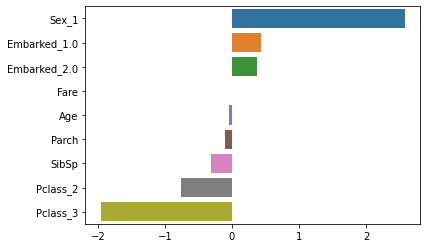

In [116]:
coef = pd.Series(coef_, index = x_dum.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)